# OCELytics
**O**bject-**C**entric **E**vent-**L**og Feature Extraction Tool

In [1]:
import os
import pandas as pd
from ocelytics.feature_extractor import extract_features


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.11/site-

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.11/site-

AttributeError: _ARRAY_API not found

## 🔍 Feature extraction from a single OCEL log file
This example demonstrates how to extract log-level features from an OCEL log.

In [2]:
import warnings 
warnings.filterwarnings('ignore')

input_path = "test_data/sample_log.jsonocel"


features = extract_features(input_path, feature_types=["log_level"])


print(f"✅ Extracted {len(features)} features")
pd.DataFrame([features]).T.rename(columns={0: "value"})

✅ Extracted 4 features


,value
n_activities,15
n_events,23
n_object_types,3
n_objects,15


## 📁 Feature extraction for multiple OCEL logs
Loop over a folder of OCEL logs and compare features.

In [3]:
log_dir = "test_data/"
feature_type = ["path_variant"]
results = []

for filename in os.listdir(log_dir):
    if filename.endswith(".jsonocel"):
        path = os.path.join(log_dir, filename)
        print(f"Processing {filename}")
        f = extract_features(path, feature_types=feature_type)
        f["log_name"] = filename
        results.append(f)

df = pd.DataFrame(results)
df.set_index("log_name", inplace=True)
df

Processing BPIC15_reduced_50pct.jsonocel
Processing sample_log.jsonocel


,kurtosis_variant_occurrence,mean_variant_occurrence,ratio_most_common_variant,ratio_top_10_variants,ratio_top_1_variants,ratio_top_20_variants,ratio_top_50_variants,ratio_top_5_variants,ratio_top_75_variants,skewness_variant_occurrence,std_variant_occurrence
log_name,,,,,,,,,,,
BPIC15_reduced_50pct.jsonocel,238.990676,1.007955,0.002368,0.106551,0.017364,0.205998,0.503552,0.056827,0.751381,14.790725,0.105235
sample_log.jsonocel,4.164090,1.500000,0.333333,0.333333,0.333333,0.466667,0.666667,0.333333,0.800000,2.405455,1.204159


## 📊 Visualize a selected feature (optional)

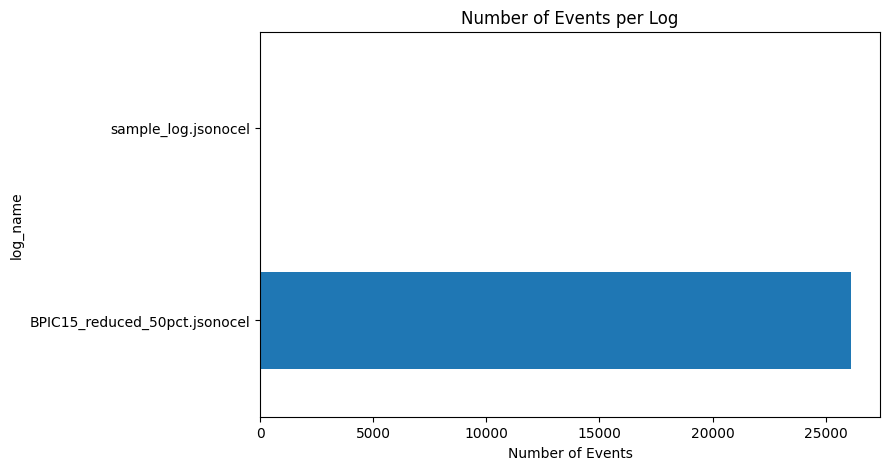

In [4]:
import matplotlib.pyplot as plt

df["n_events"].plot(kind="barh", figsize=(8, 5), title="Number of Events per Log")
plt.xlabel("Number of Events")
plt.show()